In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, confusion_matrix, precision_recall_curve
from sklearn.neural_network import MLPClassifier

from IPython.display import Image # displaying images files in jupyter
from IPython.display import IFrame # displaying pdf file in jupyter

creditcard.csv



In [2]:
data = pd.read_csv('../input/creditcard.csv').dropna()
data['Class'] = data['Class']==1

In [3]:
##Data preparation
X_labels = [c for c in data.columns if c not in ['Time','Class']]
X = data.loc[:,X_labels]
Y = data['Class']

In [4]:
# 1. Decision Tree
results = []
for d in range(1,8):
    clf = tree.DecisionTreeClassifier(max_depth=d)
    clf = clf.fit(X,Y)    
    scores = cross_val_score(clf, X, Y, cv=5)
    tn, fp, fn, tp = confusion_matrix(Y,clf.predict(X)).ravel()
    print('depth %d, False positive %.2f,False negative %.2f, mean %.8f, '%(d,fp,fn,scores.mean()))
    results.append((d,fp,fn,scores.mean()))
    
df_tree_accuracy = pd.DataFrame(data=results,columns=['depth','False positive','False negative','scores mean'])
df_tree_accuracy


## For a credit card fraud problem, we can accecpt less False Negative which predict non-fraud when fraud happens

## For the regression tree method, depth 4 seems to be the best since it has a 
## lower false negative rate while the accurancy(to avoid over-fitting) with cross vilidation is high.

depth 1, False positive 105.00,False negative 154.00, mean 0.99906603, 


depth 2, False positive 78.00,False negative 124.00, mean 0.99926266, 


depth 3, False positive 48.00,False negative 141.00, mean 0.99928373, 


depth 4, False positive 66.00,False negative 93.00, mean 0.99928724, 


depth 5, False positive 21.00,False negative 91.00, mean 0.99925915, 


depth 6, False positive 12.00,False negative 90.00, mean 0.99922053, 


depth 7, False positive 10.00,False negative 79.00, mean 0.99928022, 


,depth,False positive,False negative,scores mean
0,1,105,154,0.999066
1,2,78,124,0.999263
2,3,48,141,0.999284
3,4,66,93,0.999287
4,5,21,91,0.999259
5,6,12,90,0.999221
6,7,10,79,0.999280


With the result of regression tree,  we can see that depth 4 is the best model. We have a lower false negative rate and mid level false positive rate. Also the accuracy get from cross validation is high among all the result which kid of avoid the over-fitting.

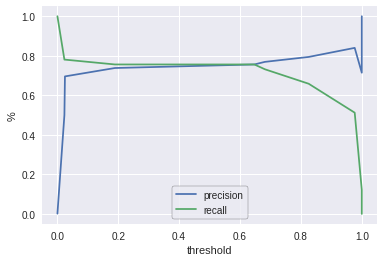

In [5]:
# Build the classifier and get the predictions

test_size_percent = 0.1
clf = tree.DecisionTreeClassifier(max_depth=4)
train_signals, test_signals, train_labels, test_labels = train_test_split(X, Y, test_size=test_size_percent)  
clf.fit(train_signals, train_labels)  
predictions = clf.predict_proba(test_signals)[:,1]  
precision, recall, thresholds = precision_recall_curve(test_labels, predictions)  
thresholds = np.append(thresholds, 1)

queue_rate = []  
for threshold in thresholds:  
    queue_rate.append((predictions >= threshold).mean())

plt.plot(thresholds, precision, color=sns.color_palette()[0])  
plt.plot(thresholds, recall, color=sns.color_palette()[1])  

leg = plt.legend(('precision', 'recall'), frameon=True)  
leg.get_frame().set_edgecolor('k')  
plt.xlabel('threshold')  
plt.ylabel('%') 

For here threshold at 0.2 performance good on both precision and recall

In [6]:
##creat list for false positive rate and false negative rate for further graphy
lsprecision = []
lsrecall = []
lscol = []
lsprecision.append((precision[2]))
lsrecall.append((recall[2]))
lscol.append(('Regression Tree'))

In [ ]:
## Random Forest

In [7]:
results = []
for d in range(1,8):
    clf_rf = RandomForestClassifier(max_features="sqrt", n_estimators=10*d, max_depth=1)
    clf_rf = clf_rf.fit(X,Y)
    scores = cross_val_score(clf_rf, X, Y, cv=5)
    tn, fp, fn, tp = confusion_matrix(Y,clf_rf.predict(X)).ravel()
    print('estimator %d, False positive %.2f,False negative %.2f, mean %.8f, '%(d*10,fp,fn,scores.mean()))
    results.append((d,fp,fn,scores.mean()))
    
df_tree_accuracy = pd.DataFrame(data=results,columns=['estimator','False positive','False negative','scores mean'])
df_tree_accuracy

## Random Forest didn't fit the model better than Regression Tree

estimator 10, False positive 3.00,False negative 371.00, mean 0.99884483, 


estimator 20, False positive 36.00,False negative 262.00, mean 0.99877461, 


estimator 30, False positive 27.00,False negative 338.00, mean 0.99882728, 


estimator 40, False positive 34.00,False negative 316.00, mean 0.99879216, 


estimator 50, False positive 40.00,False negative 273.00, mean 0.99882025, 


estimator 60, False positive 41.00,False negative 285.00, mean 0.99877812, 


estimator 70, False positive 36.00,False negative 302.00, mean 0.99885888, 


,estimator,False positive,False negative,scores mean
0,1,3,371,0.998845
1,2,36,262,0.998775
2,3,27,338,0.998827
3,4,34,316,0.998792
4,5,40,273,0.998820
5,6,41,285,0.998778
6,7,36,302,0.998859


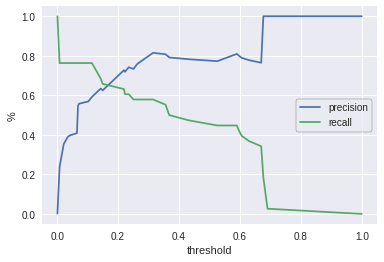

In [12]:
test_size_percent = 0.1
clf_rf = RandomForestClassifier(max_features="sqrt", n_estimators=20, max_depth=1)
train_signals, test_signals, train_labels, test_labels = train_test_split(X, Y, test_size=test_size_percent)  
clf_rf.fit(train_signals, train_labels)  
predictions = clf_rf.predict_proba(test_signals)[:,1]  
precision, recall, thresholds = precision_recall_curve(test_labels, predictions)  
thresholds = np.append(thresholds, 1)

queue_rate = []  
for threshold in thresholds:  
    queue_rate.append((predictions >= threshold).mean())

plt.plot(thresholds, precision, color=sns.color_palette()[0])  
plt.plot(thresholds, recall, color=sns.color_palette()[1])  


leg = plt.legend(('precision', 'recall'), frameon=True)  
leg.get_frame().set_edgecolor('k')  
plt.xlabel('threshold')  
plt.ylabel('%') 

In [13]:
recall

array([ 1.        ,  0.76315789,  0.76315789,  0.76315789,  0.76315789,
        0.76315789,  0.76315789,  0.76315789,  0.76315789,  0.76315789,
        0.76315789,  0.68421053,  0.65789474,  0.63157895,  0.60526316,
        0.60526316,  0.57894737,  0.57894737,  0.57894737,  0.55263158,
        0.5       ,  0.47368421,  0.44736842,  0.44736842,  0.42105263,
        0.39473684,  0.36842105,  0.34210526,  0.18421053,  0.02631579,  0.        ])

In [14]:
##creat list for false positive rate and false negative rate for further graphy
lsprecision.append((precision[10]))
lsrecall.append((recall[10]))
lscol.append(('Random Forest'))

In [16]:
lsrecall

[0.78048780487804881, 0.76315789473684215]

In [17]:
res_boosting_mean = []
res_boosting_std = []
for d in range(1,5):
    clf_boosting = AdaBoostClassifier(n_estimators=d*10, learning_rate=0.5)
    clf_boosting_scores = cross_val_score(clf_boosting, X, Y, cv=5)
    res_boosting_mean.append(clf_boosting_scores.mean())
    res_boosting_std.append(clf_boosting_scores.std())
df_boosting = pd.DataFrame({'Boosting accuracy':res_boosting_mean,'Boosting error':res_boosting_std},index=range(1,5))

In [18]:
df_boosting = pd.DataFrame({'Boosting accuracy':res_boosting_mean,'Boosting error':res_boosting_std},index=range(1,5))
df_boosting

,Boosting accuracy,Boosting error
1,0.999126,0.000192
2,0.999175,0.000182
3,0.999182,0.000166
4,0.999210,0.000179


(0, 1)

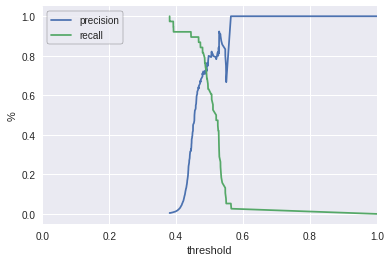

In [25]:
# Build the classifier and get the predictions
clf_boosting = AdaBoostClassifier(n_estimators=40, learning_rate=0.5)
test_size_percent = 0.1

train_signals, test_signals, train_labels, test_labels = train_test_split(X, Y, test_size=test_size_percent)  
clf_boosting.fit(train_signals, train_labels)  
predictions = clf_boosting.predict_proba(test_signals)[:,1]  
precision, recall, thresholds = precision_recall_curve(test_labels, predictions)  
thresholds = np.append(thresholds, 1)

queue_rate = []  
for threshold in thresholds:  
    queue_rate.append((predictions >= threshold).mean())

plt.plot(thresholds, precision, color=sns.color_palette()[0])  
plt.plot(thresholds, recall, color=sns.color_palette()[1])  

leg = plt.legend(('precision', 'recall'), frameon=True)  
leg.get_frame().set_edgecolor('k')  
plt.xlabel('threshold')  
plt.ylabel('%') 
plt.xlim([0, 1])


In [110]:
a = list(recall+precision)
print a.index((max(a))


TypeError: cannot do positional indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [True] of <class 'str'>

TypeError: cannot do positional indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [True] of <class 'str'>

TypeError: cannot do positional indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [True] of <class 'str'>

TypeError: cannot do positional indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [True] of <class 'str'>

TypeError: cannot do positional indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [True] of <class 'str'>

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


SyntaxError: unexpected EOF while parsing (<ipython-input-107-c7f976b39b50>, line 2)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


array([False, False, False, ..., False, False, False], dtype=bool)

In [ ]:
recall


TypeError: cannot do positional indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [True] of <class 'str'>

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


KeyError: 'True'

KeyError: 'False'

KeyError: 'False'

KeyError: 'False'

KeyError: 'False'

KeyError: 'False'

KeyError: 'False'

KeyError: 'True'

In [111]:
##try neural network

results = []
for d in range(2,6):
    clf_neural = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(d, 2), random_state=1)
    clf_neural.fit(X, Y)  
    scores = cross_val_score(clf_neural, X, Y, cv=5)
    tn, fp, fn, tp = confusion_matrix(Y,clf_neural.predict(X)).ravel()
    print('layer %d, False positive %.2f,False negative %.2f, mean %.8f, '%(d,fp,fn,scores.mean()))
    results.append((d,fp,fn,scores.mean()))
    
df_tree_accuracy = pd.DataFrame(data=results,columns=['layer','False positive','False negative','scores mean'])
df_tree_accuracy

layer 2, False positive 60.00,False negative 101.00, mean 0.99938555, 


layer 3, False positive 53.00,False negative 119.00, mean 0.99939257, 


layer 4, False positive 35.00,False negative 209.00, mean 0.99904848, 


layer 5, False positive 43.00,False negative 176.00, mean 0.99912221, 


,layer,False positive,False negative,scores mean
0,2,60,101,0.999386
1,3,53,119,0.999393
2,4,35,209,0.999048
3,5,43,176,0.999122


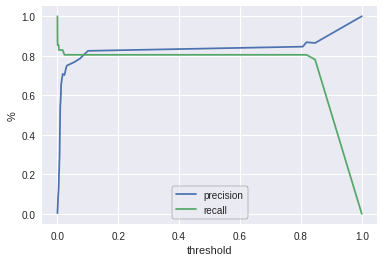

In [116]:
# Build the classifier and get the predictions
clf_neural = clf_neural = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(3, 2), random_state=1) 
test_size_percent = 0.1

train_signals, test_signals, train_labels, test_labels = train_test_split(X, Y, test_size=test_size_percent)  
clf_neural.fit(train_signals, train_labels)  
predictions = clf_neural.predict_proba(test_signals)[:,1]  
precision, recall, thresholds = precision_recall_curve(test_labels, predictions)  
thresholds = np.append(thresholds, 1)

queue_rate = []  
for threshold in thresholds:  
    queue_rate.append((predictions >= threshold).mean())

plt.plot(thresholds, precision, color=sns.color_palette()[0])  
plt.plot(thresholds, recall, color=sns.color_palette()[1])  


leg = plt.legend(('precision', 'recall'), frameon=True)  
leg.get_frame().set_edgecolor('k')  
plt.xlabel('threshold')  
plt.ylabel('%') 

I run 3 models here and regression tree with depth 4 performance best for the credit card fraud problem.